<font size="6"><center><b>TASK #1<b></font>

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
path_to_image = r"E:\KHPI\Computer Vision\Lab(1-5)\pics\12.jpg"

In [6]:
image = cv2.imread(path_to_image)  
image= cv2.resize(image, (int(image.shape[1] * 40 / 100), int(image.shape[0] * 40 / 100)), interpolation=cv2.INTER_AREA)
img = image.copy()  
K = 17  # Зададим размер шага изображения (количество пикселей в этом изображении будет КХК)
s = img.shape  # Получаем размер исходного изображенияи его тональность.
h1, w1 = s[0], s[1]  # Запоминаем отдельно высотуи ширину исходного изображения
h = (s[0] - s[1] % K)  # Делим высоту на шаг с выделением остатка и вычитаем это из начальной высоты.
# Например : (641-641% 10) = 641 - 1 = 640. Это позволяем за указанное количество шагов пройти всё изображение точно без остатка.
w = (s[1] - s[1] % K)  # То же самое для высоты
img = cv2.resize(img, (w, h))  # Меняем размер изображения на новые высоту и ширину
for y in range(0, h - 1, K):  # Пробегаем всё изображение по высоте (сверху вниз) с шагом К
    for x in range(0, w-1,K):
        if len(s) > 2:
            s = np.average(img[y:(y + K), x:(x + K)], axis=0)
            img[y:(y + K), x:(x + K)] = np.average(s, axis=0)
        else:
            s = img[y:(y + K), x:(x + K)]
            img[y:(y + K), x:(x + K)] = np.average(s)
# Если же строка возвращает значение меньше 3 (2 - ши- рина и высота), значит это полутоновое изображение, находим среднее значение цвета блока и красим его в этот цвет (как в предыдущем шаге)
img = cv2.resize(img, (w1, h1))
# Возвращаем размер изображения к размеру исходного изображения
res = np.hstack((image, img))
# Объединим исходное и дискретизированное изображение в одно окно для сравнения
cv2.imshow("Img", res)  # и выведем это окно на экран
cv2.waitKey(0)
cv2.destroyAllWindows()

<font size="6"><center><b>TASK #2<b></font>

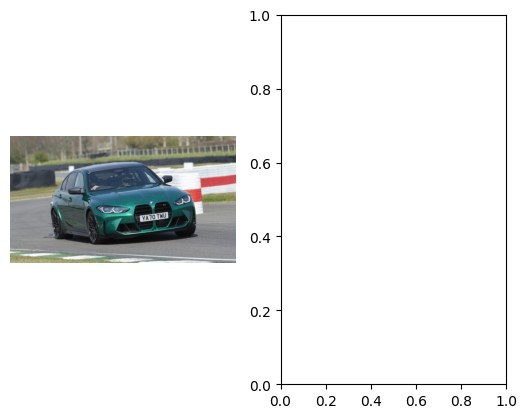

In [7]:
plt.subplot(121)
img = cv2.imread(path_to_image)
img= cv2.resize(img, (int(img.shape[1] * 40 / 100), int(img.shape[0] * 40 / 100)), interpolation=cv2.INTER_AREA)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  #
# Меняем формат BGR на RGB
plt.axis("off")
plt.subplot(122)
Z = img.reshape((-1, 3))  # Изменяем размер массива изоб- ражения, где (-1,3) - задаем число строк и столбцов, в которые помещаем прежний массив. В данном случае 3 - означает в 3 столбца, а -1 это исключение, означает что мы даем python самому понять во сколько строк это можно уместить
Z = np.float32(Z)  # преобразуем массив к float (числа с плавающей точкой)
crt = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10,
       1.0)  # Критерии для остановки квантования. Здесь останавливаем квантование, если достигли 10 итераций или если достигли точности в 1.0)
K = 17  # Количество градаций изображения
ret, label, center = cv2.kmeans(Z, K, None, crt, 10, cv2.KMEANS_RANDOM_CENTERS)  # Функция квантования
# Преобразуем изображение к начальному виду:
center = np.uint8(center)  # Преобразование матрицы к формату uint8 (от 0 до 255)
res = center[label.flatten()]  # Сворачиваем массив не- скольких матриц в одну
res2 = res.reshape((img.shape))
# Выводим изображение на экран:
res3= np.hstack((img, res2))
cv2.imshow("Img", res3)

cv2.waitKey(0)
cv2.destroyAllWindows()